## Exercici 1
Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("../estructures_dataframe/DelayedFlights.csv", sep=",")

In [3]:
df = df.set_index('Unnamed: 0')

#Dropping Na
df = df.dropna()

In [4]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,1333,N334SW,121.0,135.0,107.0,80.0,94.0,IND,MCO,828,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,675,N286WN,228.0,240.0,213.0,15.0,27.0,IND,PHX,1489,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0
18,2008,1,3,4,1323.0,1255,1526.0,1510,WN,4,N674AA,123.0,135.0,110.0,16.0,28.0,IND,TPA,838,4.0,9.0,0,N,0,0.0,0.0,0.0,0.0,16.0


In [5]:
df.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000
mean,2008.000,6.065,15.725,3.980,1558.832,1487.949,1616.749,1652.458,2276.526,135.378,131.764,107.420,63.291,59.677,741.587,7.297,20.660,0.000,0.000,19.179,3.703,15.022,0.090,25.296
std,0.000,3.509,8.793,1.993,454.330,421.178,583.942,461.737,1997.547,72.296,69.532,68.175,60.754,59.869,559.364,6.033,16.680,0.000,0.000,43.546,21.492,33.833,2.023,42.055
min,2008.000,1.000,1.000,1.000,1.000,0.000,1.000,0.000,1.000,14.000,-21.000,0.000,15.000,6.000,11.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2008.000,3.000,8.000,2.000,1232.000,1150.000,1326.000,1340.000,637.000,83.000,80.000,58.000,26.000,24.000,334.000,4.000,11.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,2008.000,6.000,16.000,4.000,1618.000,1529.000,1737.000,1722.000,1589.000,118.000,115.000,90.000,43.000,41.000,595.000,6.000,16.000,0.000,0.000,2.000,0.000,2.000,0.000,8.000
75%,2008.000,9.000,23.000,6.000,1924.000,1830.000,2048.000,2022.000,3676.000,167.000,161.000,136.000,79.000,75.000,972.000,8.000,24.000,0.000,0.000,21.000,0.000,15.000,0.000,33.000
max,2008.000,12.000,31.000,7.000,2400.000,2359.000,2400.000,2359.000,9741.000,1114.000,660.000,1091.000,2461.000,2467.000,4962.000,240.000,422.000,0.000,0.000,2436.000,1352.000,1357.000,392.000,1316.000


### Per poder realitzar el train test split necesitem que una columna sigui el target (y)

Com que hem especificat que la mida del subconjunt test és 0.20, el subconjunt test contindrá el 20% de les dades i el train el 80%.

In [6]:
# Selecting X and y (target)
X = df.loc[:, df.columns != 'CarrierDelay']
y = df.CarrierDelay

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=0) 

In [8]:
X_train.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,997988.000,997988.000,997988.000,997988.000,997988.000,997988.000,997988.000,997988.000,997988.000,997988.000,997988.000,997988.000,997988.000,997988.000,997988.000,997988.000,997988.000,997988.000,997988.000,997988.000,997988.000,997988.000,997988.000
mean,2008.000,6.064,15.731,3.980,1558.504,1487.648,1616.404,1652.119,2278.798,135.424,131.801,107.456,63.318,59.696,741.714,7.301,20.667,0.000,0.000,3.711,15.024,0.091,25.303
std,0.000,3.510,8.792,1.993,454.385,421.212,583.806,461.666,1997.679,72.304,69.533,68.184,60.859,59.967,559.221,6.045,16.694,0.000,0.000,21.640,33.910,2.068,42.009
min,2008.000,1.000,1.000,1.000,1.000,0.000,1.000,0.000,1.000,14.000,-21.000,0.000,15.000,6.000,24.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2008.000,3.000,8.000,2.000,1232.000,1150.000,1325.000,1340.000,638.000,83.000,81.000,58.000,26.000,24.000,334.000,4.000,11.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,2008.000,6.000,16.000,4.000,1618.000,1528.000,1736.000,1722.000,1592.000,118.000,115.000,90.000,43.000,41.000,595.000,6.000,16.000,0.000,0.000,0.000,2.000,0.000,8.000
75%,2008.000,9.000,23.000,6.000,1924.000,1830.000,2048.000,2022.000,3679.000,167.000,161.000,136.000,79.000,75.000,972.000,8.000,24.000,0.000,0.000,0.000,15.000,0.000,33.000
max,2008.000,12.000,31.000,7.000,2400.000,2359.000,2400.000,2359.000,9741.000,1114.000,660.000,1091.000,2461.000,2467.000,4962.000,240.000,422.000,0.000,0.000,1352.000,1357.000,392.000,1303.000


In [9]:
X_test.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,249498.000,249498.000,249498.000,249498.000,249498.000,249498.000,249498.000,249498.000,249498.000,249498.000,249498.000,249498.000,249498.000,249498.000,249498.000,249498.000,249498.000,249498.000,249498.000,249498.000,249498.000,249498.000,249498.000
mean,2008.000,6.073,15.705,3.982,1560.145,1489.154,1618.129,1653.813,2267.439,135.195,131.615,107.279,63.185,59.604,741.076,7.282,20.634,0.000,0.000,3.674,15.010,0.089,25.272
std,0.000,3.504,8.797,1.996,454.110,421.043,584.482,462.021,1996.998,72.265,69.530,68.137,60.331,59.474,559.936,5.984,16.623,0.000,0.000,20.888,33.524,1.831,42.239
min,2008.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,15.000,15.000,0.000,15.000,6.000,11.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2008.000,3.000,8.000,2.000,1233.000,1153.000,1327.000,1340.000,629.000,82.000,80.000,58.000,26.000,24.000,334.000,4.000,11.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,2008.000,6.000,16.000,4.000,1619.000,1530.000,1738.000,1725.000,1582.000,118.000,115.000,89.000,43.000,41.000,595.000,6.000,16.000,0.000,0.000,0.000,2.000,0.000,8.000
75%,2008.000,9.000,23.000,6.000,1925.000,1830.000,2049.000,2023.000,3660.000,167.000,160.000,136.000,79.000,75.000,967.000,8.000,24.000,0.000,0.000,0.000,15.000,0.000,33.000
max,2008.000,12.000,31.000,7.000,2400.000,2359.000,2400.000,2359.000,7829.000,790.000,660.000,664.000,1325.000,1316.000,4962.000,225.000,370.000,0.000,0.000,1148.000,872.000,169.000,1316.000


El subconjunt test conté 249 498 files, el 20% del total (1 247 486). El subconjunt train, per la seua banda, conté el 80% restant (997 988 files).
Podem afirmar que el subconjunt test és una mostra representativa de la població, ja que els valors mitjans son molt semblants en tots els casos. Per exemple, la mitjana de tota la població de ActualElapsedTime és **135.378**, del subconjunt de train és **135.424** i del subconjunt test, **135.195**.

## Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

### Creació de columnes dummy amb la columna UniqueCarrier

In [10]:
df_2 = df.copy()
df_2.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,1333,N334SW,121.0,135.0,107.0,80.0,94.0,IND,MCO,828,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,675,N286WN,228.0,240.0,213.0,15.0,27.0,IND,PHX,1489,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0
18,2008,1,3,4,1323.0,1255,1526.0,1510,WN,4,N674AA,123.0,135.0,110.0,16.0,28.0,IND,TPA,838,4.0,9.0,0,N,0,0.0,0.0,0.0,0.0,16.0


In [11]:
df_2_dummies = pd.get_dummies(df_2['UniqueCarrier'], drop_first=True)

#### Unim els dos dataframes: df_2 i df_2_dummies

In [12]:
df_2_plus = pd.merge(left=df_2, left_index=True, right=df_2_dummies, right_index=True)

In [13]:
df_2_plus.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,1333,N334SW,121.0,135.0,107.0,80.0,94.0,IND,MCO,828,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,675,N286WN,228.0,240.0,213.0,15.0,27.0,IND,PHX,1489,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
18,2008,1,3,4,1323.0,1255,1526.0,1510,WN,4,N674AA,123.0,135.0,110.0,16.0,28.0,IND,TPA,838,4.0,9.0,0,N,0,0.0,0.0,0.0,0.0,16.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Estandarització de les columnes AirTime, ArrDelay, Distance, TaxiIn, TaxiOut, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay

In [15]:
from sklearn.preprocessing import MinMaxScaler

df_2_scaler = df_2[['AirTime', 'ArrDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]

scaler = MinMaxScaler(feature_range=(0, 1))

df_2_scaler = pd.DataFrame(scaler.fit_transform(df_2_scaler), index = df_2_scaler.index, columns = df_2_scaler.columns)

df_2_scaler.head()


,AirTime,ArrDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Unnamed: 0,,,,,,,,,,
4,0.070577,0.007768,0.101798,0.012500,0.023697,0.000821,0.0,0.0,0.0,0.024316
6,0.210816,0.017171,0.319127,0.012500,0.016588,0.004105,0.0,0.0,0.0,0.035714
11,0.098075,0.026574,0.165017,0.025000,0.018957,0.003284,0.0,0.0,0.0,0.054711
16,0.195234,0.000000,0.298526,0.029167,0.018957,0.001232,0.0,0.0,0.0,0.009119
18,0.100825,0.000409,0.167037,0.016667,0.021327,0.000000,0.0,0.0,0.0,0.012158


#### Unim els dos dataframes: df_2_plus i df_2_scaler

In [16]:
df_2_plus_plus = pd.merge(left=df_2_plus, left_index=True, right=df_2_scaler, right_index=True)

### Observem el df final amb les columnes estandaritzades i les dummy creades a partir d'UniqueCarrier

In [17]:
df_2_plus_plus.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime_x,ArrDelay_x,DepDelay,Origin,Dest,Distance_x,TaxiIn_x,TaxiOut_x,Cancelled,CancellationCode,Diverted,CarrierDelay_x,WeatherDelay_x,NASDelay_x,SecurityDelay_x,LateAircraftDelay_x,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV,AirTime_y,ArrDelay_y,Distance_y,TaxiIn_y,TaxiOut_y,CarrierDelay_y,WeatherDelay_y,NASDelay_y,SecurityDelay_y,LateAircraftDelay_y
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.070577,0.007768,0.101798,0.012500,0.023697,0.000821,0.0,0.0,0.0,0.024316
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.210816,0.017171,0.319127,0.012500,0.016588,0.004105,0.0,0.0,0.0,0.035714
11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,1333,N334SW,121.0,135.0,107.0,80.0,94.0,IND,MCO,828,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.098075,0.026574,0.165017,0.025000,0.018957,0.003284,0.0,0.0,0.0,0.054711
16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,675,N286WN,228.0,240.0,213.0,15.0,27.0,IND,PHX,1489,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.195234,0.000000,0.298526,0.029167,0.018957,0.001232,0.0,0.0,0.0,0.009119
18,2008,1,3,4,1323.0,1255,1526.0,1510,WN,4,N674AA,123.0,135.0,110.0,16.0,28.0,IND,TPA,838,4.0,9.0,0,N,0,0.0,0.0,0.0,0.0,16.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.100825,0.000409,0.167037,0.016667,0.021327,0.000000,0.0,0.0,0.0,0.012158


## Exercici 3
Resumeix les noves columnes generades de manera estadística i gràfica

In [36]:
noves_col_dumm = df_2_plus_plus.iloc[:,29:48]

In [39]:
# Estadístics de les noves columnes dummy
noves_col_dumm.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
count,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000
mean,0.106,0.000,0.019,0.031,0.047,0.058,0.046,0.013,0.038,0.003,0.078,0.044,0.031,0.071,0.077,0.048,0.163,0.058,0.041
std,0.308,0.017,0.137,0.172,0.212,0.234,0.208,0.112,0.190,0.059,0.268,0.205,0.175,0.257,0.266,0.213,0.370,0.233,0.197
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [35]:
# Estadístics de les noves columnes escalades
noves_col_scal = df_2_plus_plus.iloc[:,48:]
noves_col_scal.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,AirTime_y,ArrDelay_y,Distance_y,TaxiIn_y,TaxiOut_y,CarrierDelay_y,WeatherDelay_y,NASDelay_y,SecurityDelay_y,LateAircraftDelay_y
count,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000
mean,0.098,0.020,0.148,0.030,0.049,0.008,0.003,0.011,0.000,0.019
std,0.062,0.025,0.113,0.025,0.040,0.018,0.016,0.025,0.005,0.032
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.053,0.004,0.065,0.017,0.026,0.000,0.000,0.000,0.000,0.000
50%,0.082,0.011,0.118,0.025,0.038,0.001,0.000,0.001,0.000,0.006
75%,0.125,0.026,0.194,0.033,0.057,0.009,0.000,0.011,0.000,0.025
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [31]:
# Estadístics de les antigues columnes no escalades
antigues_col = df_2.loc[:,['AirTime', 'ArrDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
                           'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]
antigues_col.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,AirTime,ArrDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000,1247486.000
mean,107.420,63.291,741.587,7.297,20.660,19.179,3.703,15.022,0.090,25.296
std,68.175,60.754,559.364,6.033,16.680,43.546,21.492,33.833,2.023,42.055
min,0.000,15.000,11.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,58.000,26.000,334.000,4.000,11.000,0.000,0.000,0.000,0.000,0.000
50%,90.000,43.000,595.000,6.000,16.000,2.000,0.000,2.000,0.000,8.000
75%,136.000,79.000,972.000,8.000,24.000,21.000,0.000,15.000,0.000,33.000
max,1091.000,2461.000,4962.000,240.000,422.000,2436.000,1352.000,1357.000,392.000,1316.000


Les columnes que s'han creat després de fer el dummy s'assemblen a una sparse matrix. S'han creat 19 columnes on en cada fila 18 o 19 tindran un zero i només una o ninguna tindran un 1. 
Amb els següents countplots podem observar gràficament que hi ha molt pocs valors differents de zero en les noves columnes.

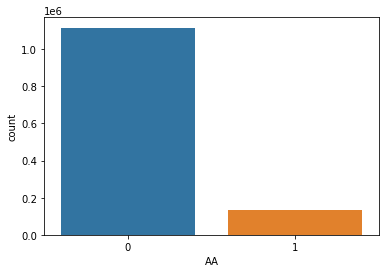

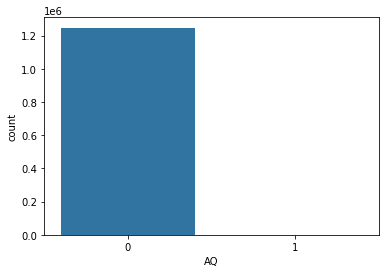

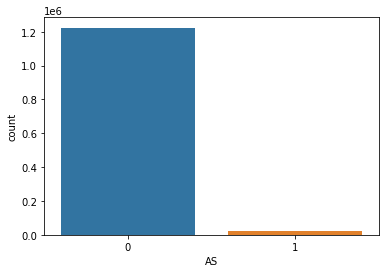

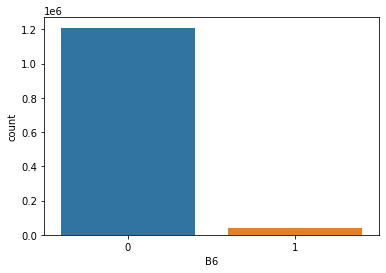

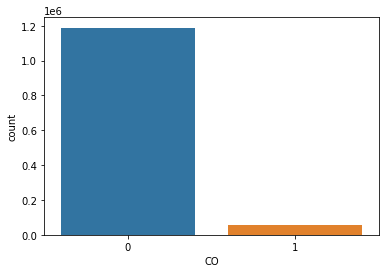

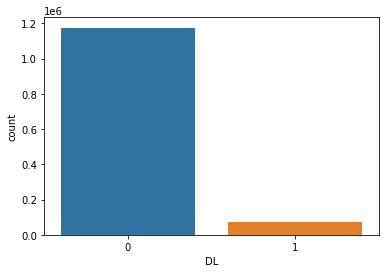

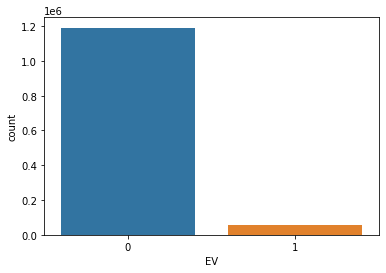

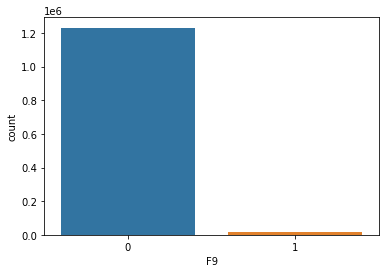

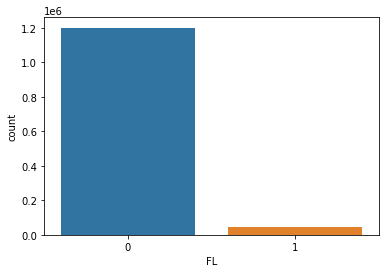

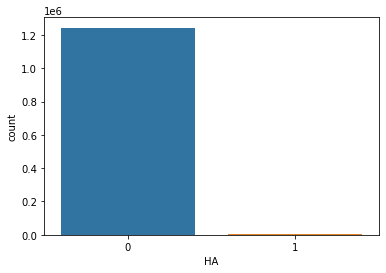

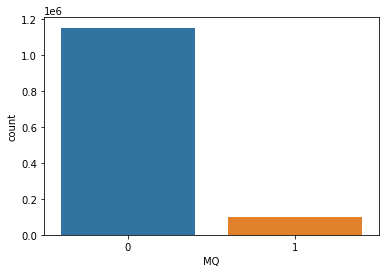

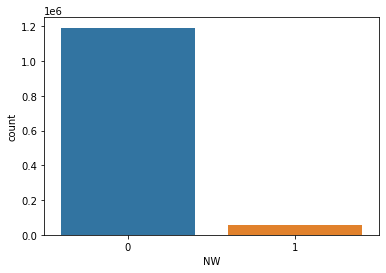

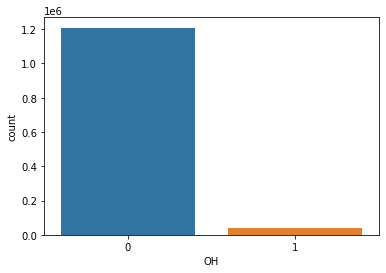

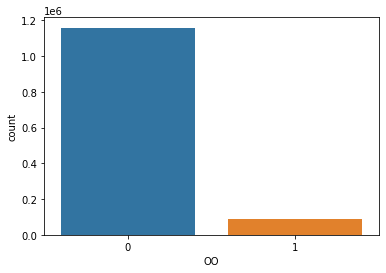

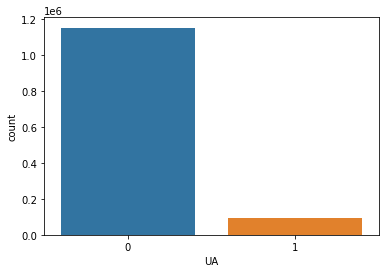

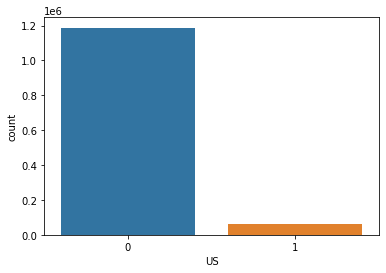

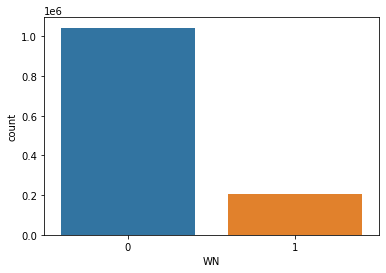

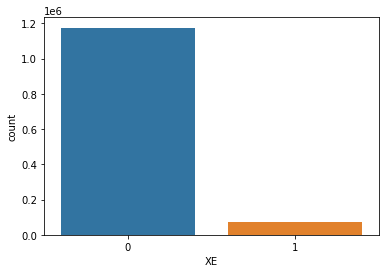

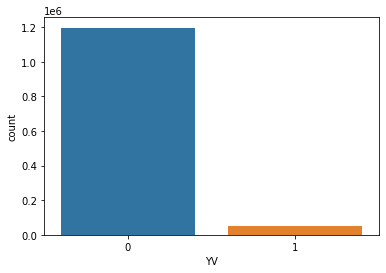

<Figure size 432x288 with 0 Axes>

In [52]:
for col in noves_col_dumm.columns:
    sns.countplot(x=col, data=noves_col_dumm)
    plt.show()

Pel que fa a la resta de columnes, les escalades, encara que a nivell estadístic haguin canviat els valors mínim, màxim, desviació estàndard, etc. després d'escalar les dades, com que hem utilitzat el MinMaxScaler, la distribució d'aquestes no ha canviat, com podem veure comparant els histogrames. 

Agafem com a exemple AirTime i Distance, com observem en els següents 4 histogrames, la distribució de les dades es la mateixa, la única diferència és l'escala de l'eix X.

<ipython-input-65-3a1af2a2e67c>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  ax_ = noves_col_scal[['AirTime_y', 'Distance_y']].hist(ax=ax)


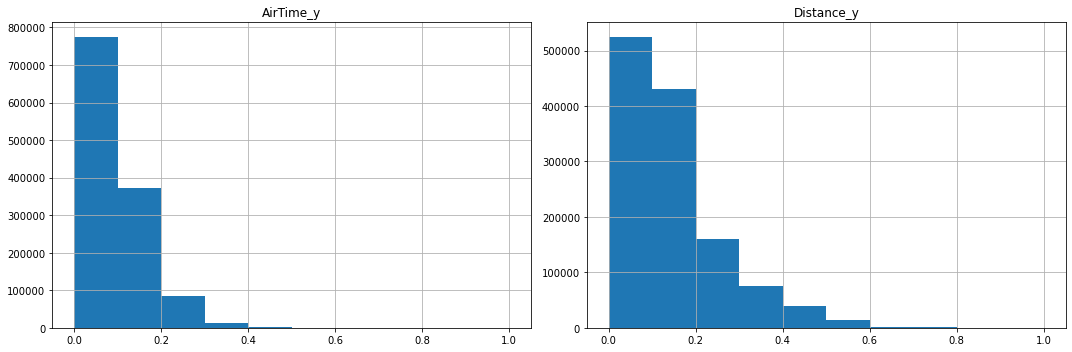

In [65]:
fig, ax = plt.subplots(figsize=(15, 5))
ax_ = noves_col_scal[['AirTime_y', 'Distance_y']].hist(ax=ax)
plt.tight_layout()

<ipython-input-67-0c5a97b4a563>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  ax_ = antigues_col[['AirTime', 'Distance']].hist(ax=ax)


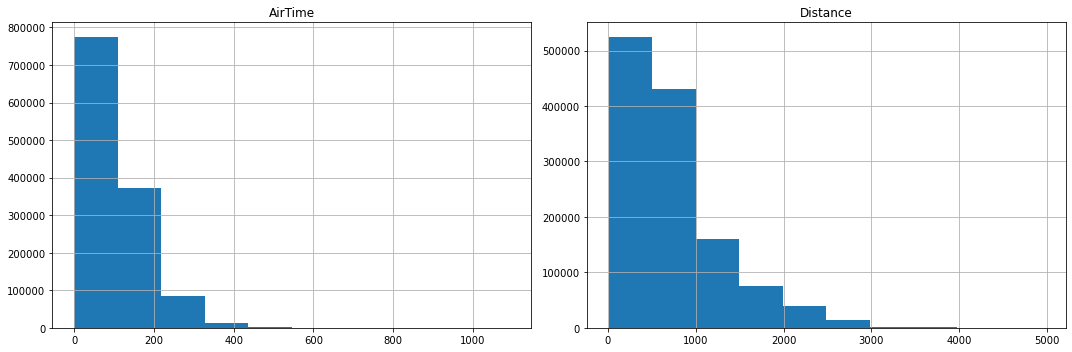

In [67]:
fig, ax = plt.subplots(figsize=(15, 5))
ax_ = antigues_col[['AirTime', 'Distance']].hist(ax=ax)
plt.tight_layout()

Histogrames de totes les columnes escalades:

<ipython-input-55-8ef7a6dda568>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  ax_ = noves_col_scal.hist(ax=ax)


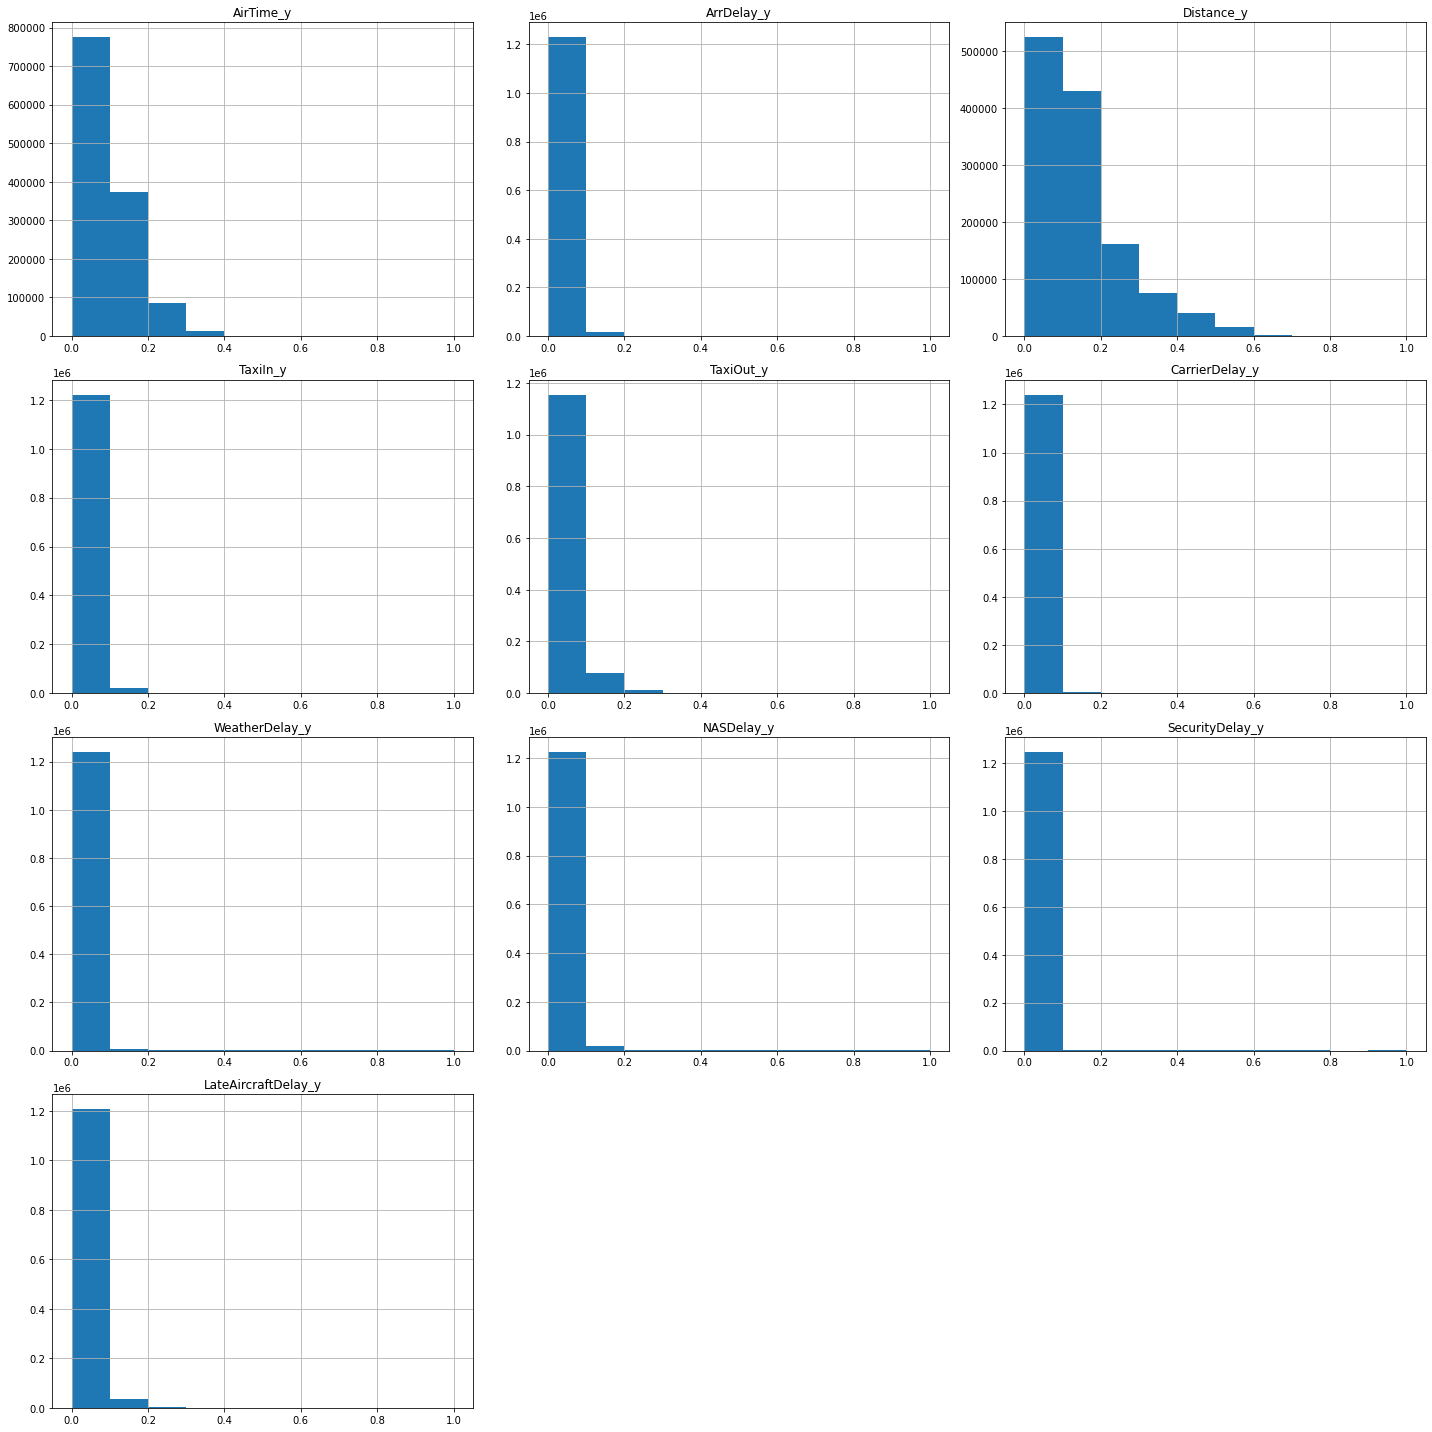

In [55]:
fig, ax = plt.subplots(figsize=(20, 20))
ax_ = noves_col_scal.hist(ax=ax)
plt.tight_layout()

Histogrames de totes les columnes sense escalar:

<ipython-input-56-62caf024b256>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  ax_ = antigues_col.hist(ax=ax)


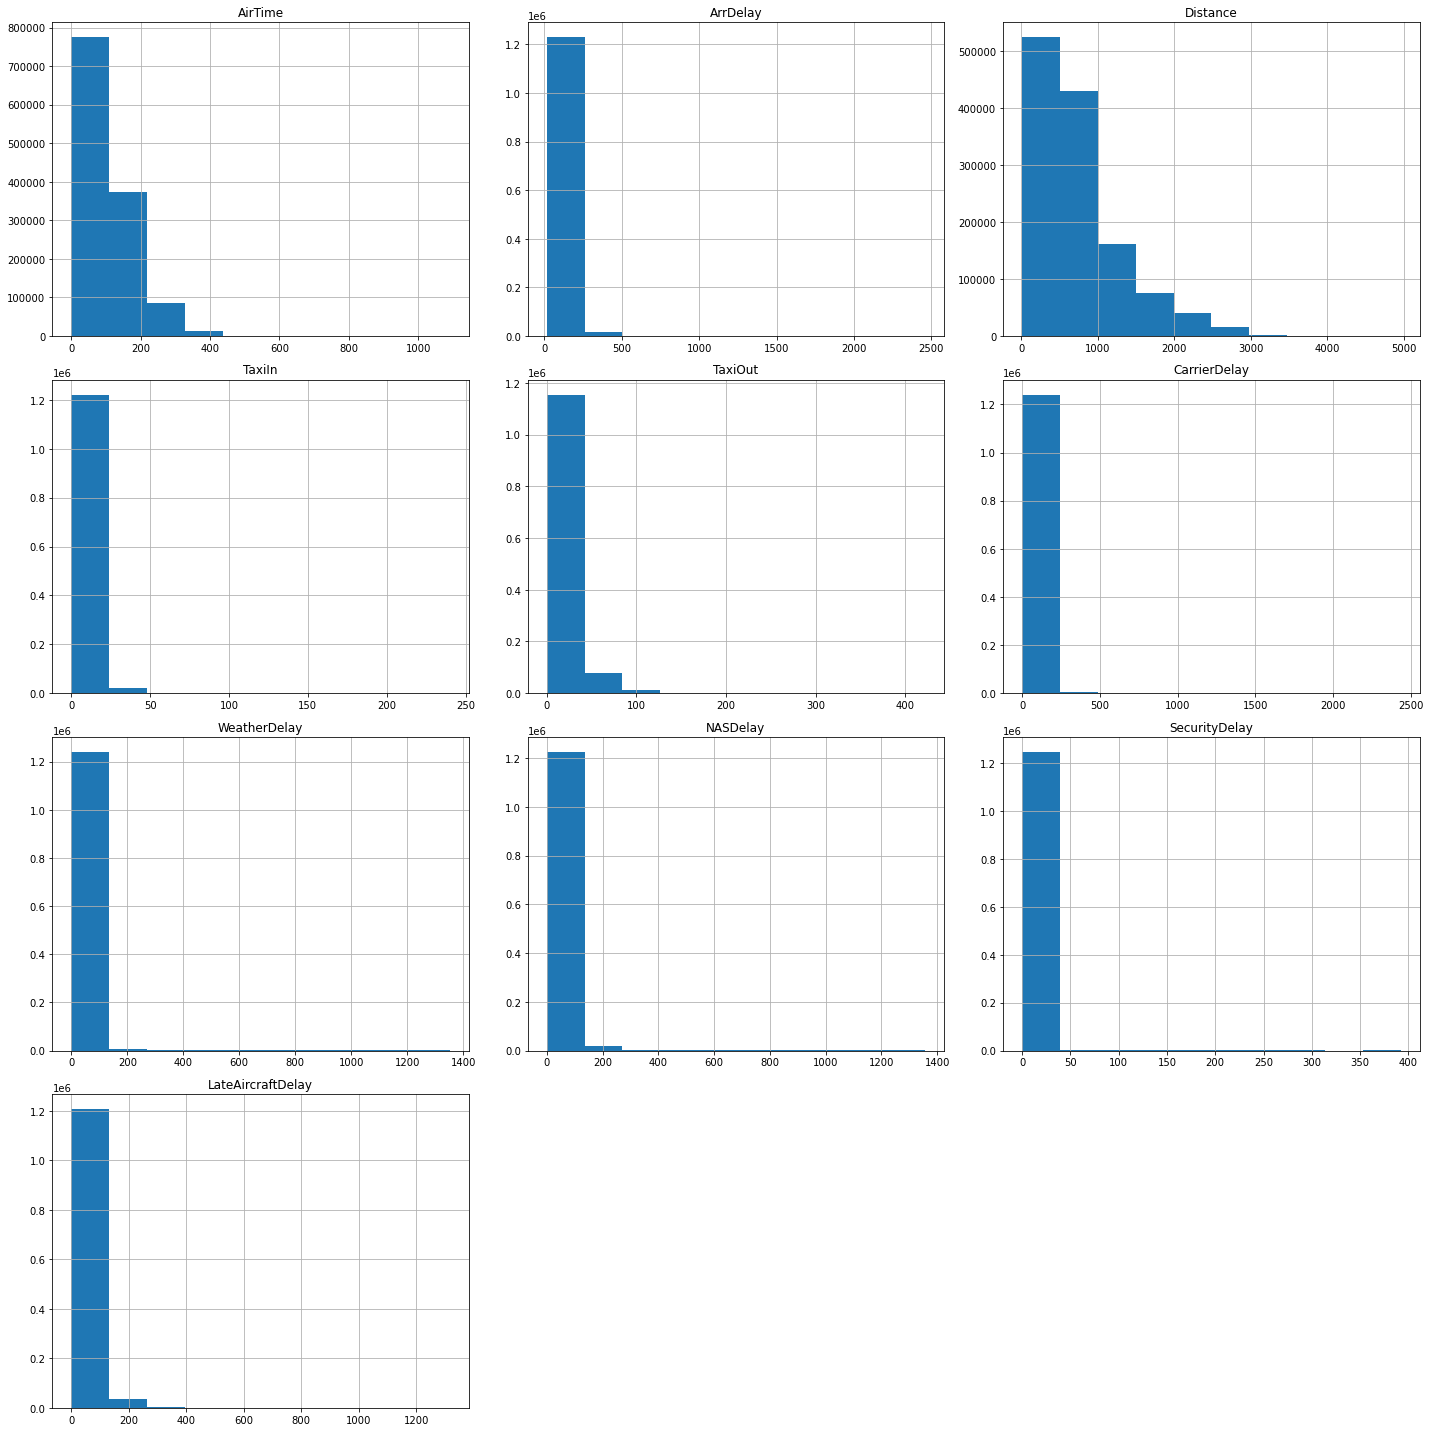

In [56]:
fig, ax = plt.subplots(figsize=(20, 20))
ax_ = antigues_col.hist(ax=ax)
plt.tight_layout()